### Task 1: Identify class imbalance and see why accuracy is misleading.

In [1]:
from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

X,y = make_classification(n_samples=1000, n_features=7, n_informative=4, weights=[0.9,0.1],n_classes=2,random_state=42)
# X_train, y_train, X_test, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [3]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, confusion_matrix

print("Accuracy: ",accuracy_score(y_test,y_predict))
print("Precision: ",precision_score(y_test,y_predict))
print("ROC AUC Score: ",roc_auc_score(y_test,y_predict))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_predict))

Accuracy:  0.9633333333333334
Precision:  0.875
ROC AUC Score:  0.8565339101666878
Confusion Matrix: 
 [[268   3]
 [  8  21]]


In [8]:
y_prob = model.predict_proba(X_test)[:,1]

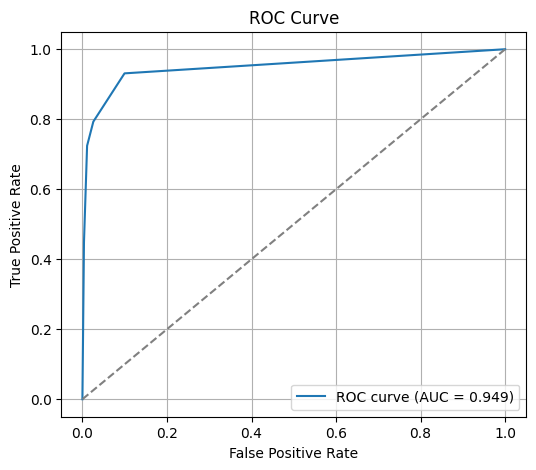

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})") 
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

FPR: False Positive Rate: Positive कुरालाई incorrectly predict गर्यो |

TPR: True Positive Rate: Positive कुरालाई positively predictगर्यो |

### Task 2: Fix imbalance using data-level methods.

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3,stratify=y)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train,y_train) # type: ignore

model2 = RandomForestClassifier(class_weight='balanced')

model2.fit(X_train_res,y_train_res)
pred = model2.predict(X_test)
pred_probs = model2.predict_proba(X_test)

In [19]:
print("Accuracy: ",accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred))
print("ROC AUC Score: ",roc_auc_score(y_test,pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,pred))

Accuracy:  0.96
Precision:  0.8064516129032258
ROC AUC Score:  0.8920733900947355
Confusion Matrix: 
 [[263   6]
 [  6  25]]


### Task 3: Handle imbalance algorithmically.

In [20]:
threshold = 0.3
y_pred = (pred_probs[:,1] > threshold).astype(int)


In [23]:
from sklearn.metrics import f1_score

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy:  0.9366666666666666
F1 Score:  0.7323943661971831
Precision:  0.65
ROC AUC Score:  0.8933325338769638
Confusion Matrix: 
 [[255  14]
 [  5  26]]


### Task 4: Apply everything to a real-world dataset.